In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


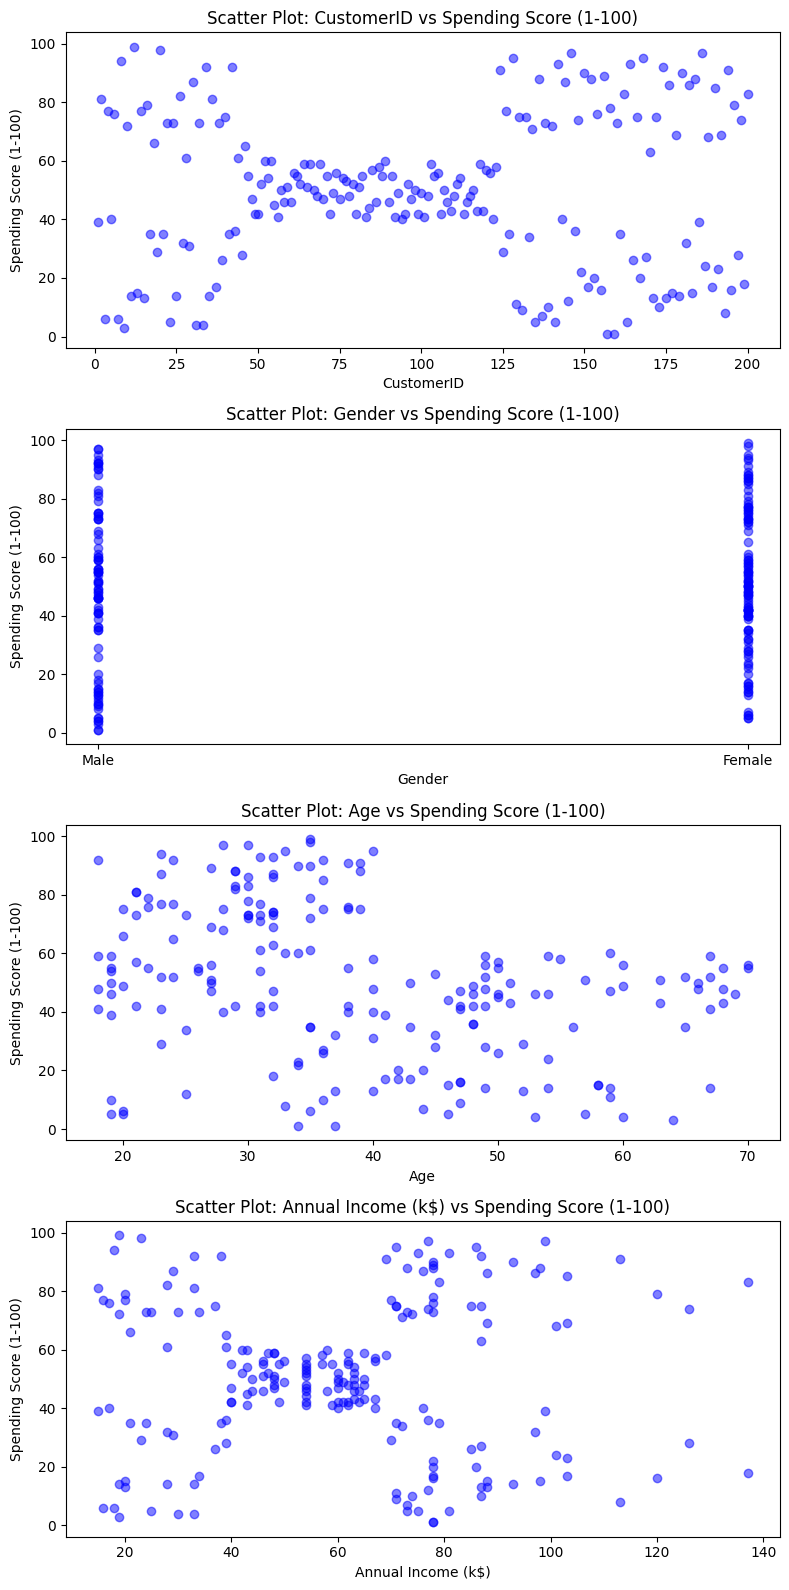

In [5]:
# Define target column
target_col = 'Spending Score (1-100)'

# Create subplots
fig, axes = plt.subplots(nrows=len(df.columns)-1, ncols=1, figsize=(8, 4 * (len(df.columns)-1)))

# Plot each column against Spending Score
for i, col in enumerate(df.columns):
    if col != target_col:  # Exclude the target column itself
        axes[i].scatter(df[col], df[target_col], alpha=0.5, color='b')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)
        axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()
plt.show()

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


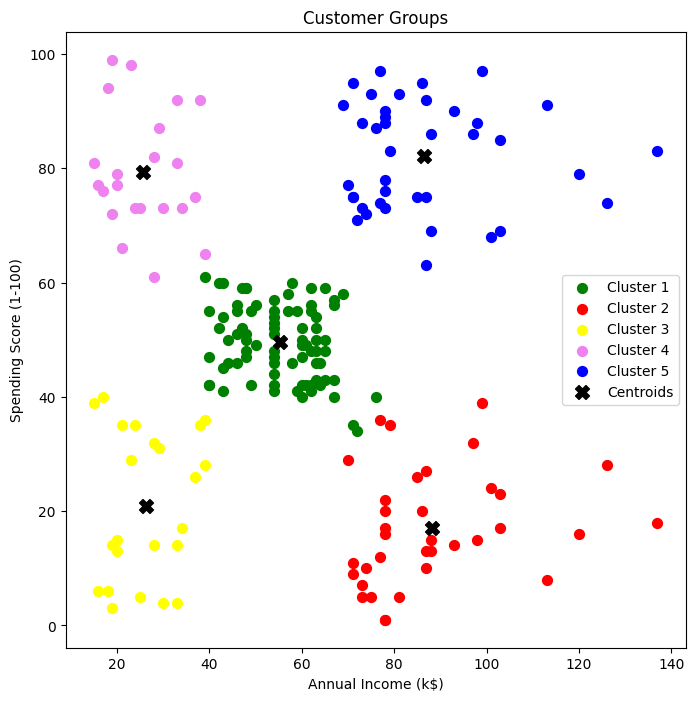

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select features for clustering (Ensure it has only two columns for 2D plotting)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values  # Convert to NumPy array

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

# Fit the model and get cluster labels
y = kmeans.fit_predict(X)
print(y)

# Step 3: Plot clusters with centroids
plt.figure(figsize=(8, 8))

# Plot each cluster separately
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s=50, c='blue', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label="Centroids")

# Labels and title
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
